<a href="https://colab.research.google.com/github/chasuar/Raspberry_study/blob/main/7_Dataset_Making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import PIL


In [3]:
base_dir = '/content/drive/MyDrive/창의적종합설계 2분반/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [4]:
train_o_dir = os.path.join(train_dir, 'o')
train_x_dir = os.path.join(train_dir, 'x')
print(train_o_dir, train_x_dir)

/content/drive/MyDrive/창의적종합설계 2분반/dataset/train/o /content/drive/MyDrive/창의적종합설계 2분반/dataset/train/x


In [5]:
test_o_dir = os.path.join(test_dir, 'o')
test_x_dir = os.path.join(test_dir, 'x')
print(test_o_dir, test_x_dir)


/content/drive/MyDrive/창의적종합설계 2분반/dataset/test/o /content/drive/MyDrive/창의적종합설계 2분반/dataset/test/x


In [6]:
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)


['o_0.jpg', 'o_1.jpg', 'o_2.jpg', 'o_3.jpg', 'o_4.jpg', 'o_5.jpg', 'o_6.jpg', 'o_7.jpg', 'o_8.jpg', 'o_9.jpg', 'o_11.jpg', 'o_10.jpg', 'o_13.jpg', 'o_14.jpg', 'o_15.jpg', 'o_16.jpg', 'o_17.jpg', 'o_18.jpg', 'o_19.jpg', 'o_20.jpg', 'o_12.jpg']
['x_0.jpg', 'x_1.jpg', 'x_2.jpg', 'x_3.jpg', 'x_4.jpg', 'x_5.jpg', 'x_6.jpg', 'x_7.jpg', 'x_8.jpg', 'x_9.jpg', 'x_10.jpg', 'x_11.jpg', 'x_12.jpg', 'x_13.jpg', 'x_14.jpg', 'x_15.jpg', 'x_16.jpg', 'x_17.jpg', 'x_18.jpg', 'x_19.jpg', 'x_20.jpg']


In [7]:
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))
print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))


Total training o images : 21
Total training x images : 21
Total test o images : 6
Total test x images : 6


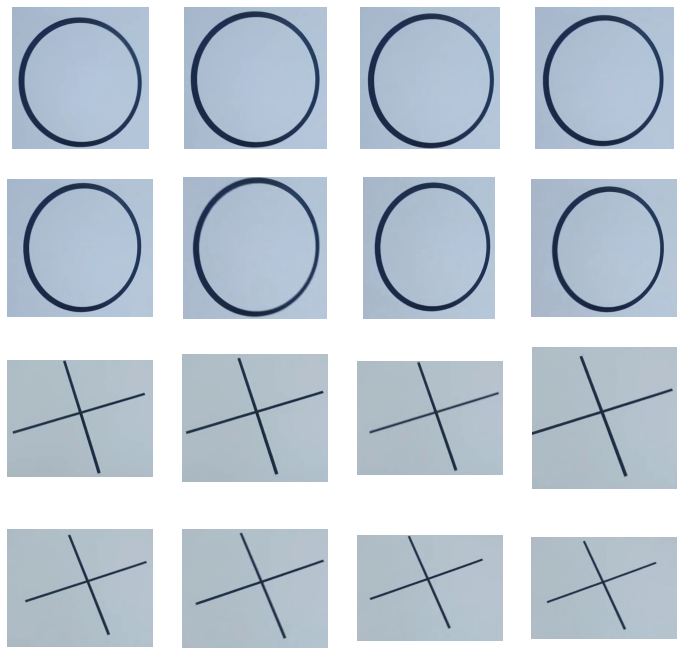

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [10]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [13]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 제작
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(100,100))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4, # 한번에 변환된 이미지 4개씩 제작
                                                  color_mode='grayscale', # 흑백 이미지 처리
                                                  class_mode='binary',
                                                  target_size=(100,100))

Found 42 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'o': 0, 'x': 1}

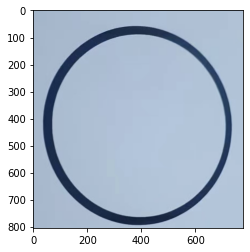

In [20]:
img = mpimg.imread(next_o_pix[0])
plt.imshow(img)

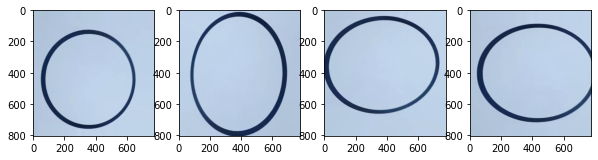

In [21]:
max_iter = 4
cnt = 1
sample_img2 = img[np.newaxis, ...]
plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (100, 100, 1)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (14, 14, 32)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [24]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
model.fit(train_generator, epochs = 10)

Epoch 1/10
3/3 [==============================] - 8s 3s/step - loss: 2.0604 - accuracy: 0.2857
Epoch 2/10
3/3 [==============================] - 1s 248ms/step - loss: 1.1001 - accuracy: 0.6429
Epoch 3/10
3/3 [==============================] - 1s 292ms/step - loss: 0.6074 - accuracy: 0.6190
Epoch 4/10
3/3 [==============================] - 1s 282ms/step - loss: 0.5712 - accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 1s 247ms/step - loss: 0.3347 - accuracy: 0.9762
Epoch 6/10
3/3 [==============================] - 1s 243ms/step - loss: 0.1023 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 248ms/step - loss: 0.0456 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 219ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 226ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 215ms/step - loss: 0.0055 - accuracy: 1.0000


In [26]:
model.evaluate(train_generator)

3/3 [==============================] - 1s 165ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0027374494820833206, 1.0]

In [27]:
model.evaluate(test_generator)

3/3 [==============================] - 3s 1s/step - loss: 6.1804e-04 - accuracy: 1.0000


[0.0006180391646921635, 1.0]

In [34]:
model.save('ox_Model.h5')

In [35]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

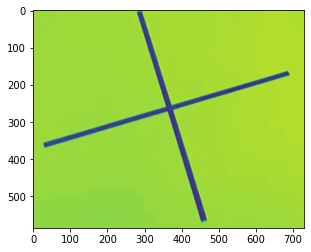

In [53]:
img =Image.open("/content/drive/MyDrive/창의적종합설계 2분반/dataset/test/x/x_0.jpg").convert("L")
plt.imshow(img)
plt.show()

In [54]:
img=img.resize((100,100))
img=np.array(img)
img.shape


(100, 100)

In [55]:
img=255-img
img=img/255.0
img=img.reshape((1,100,100,1))
print(img.shape)

(1, 100, 100, 1)


In [56]:
predict=model.predict_on_batch(img)
mypred = np.argmax(predict, axis = 1)
print("predict:", mypred)
print('Prediction : {}'.format(mypred[0]))

predict: [1]
Prediction : 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


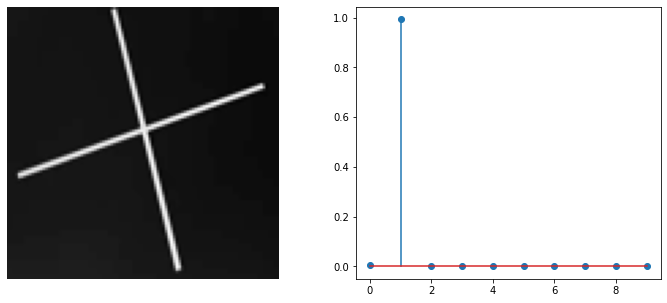

In [57]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.imshow(img.reshape(100, 100), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(predict[0])
plt.show()
